In [2]:
! pip install pydotplus graphviz

     |████████████████████████████████| 286kB 6.8MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-04 19:11:58--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  32.3MB/s   in 2.2s   

2020-10-04 19:12:01 (32.3 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



# Reading Data

In [5]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df.shape

(194673, 38)

# Data Pre-Processing

In [7]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [9]:
df['SEVERITYCODE.1'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE.1, dtype: int64

In [10]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [11]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [12]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [13]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [14]:
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [15]:
df['SPEEDING'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: SPEEDING, dtype: object

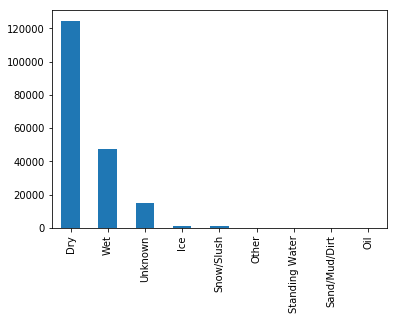

In [16]:
df['ROADCOND'].value_counts().plot(kind = 'bar')

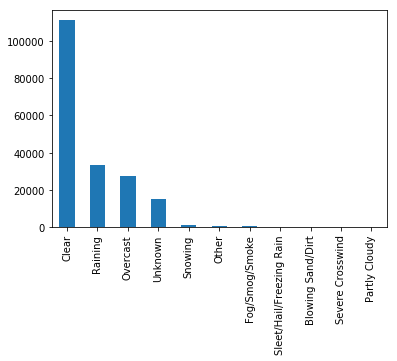

In [17]:
df['WEATHER'].value_counts().plot(kind = 'bar')

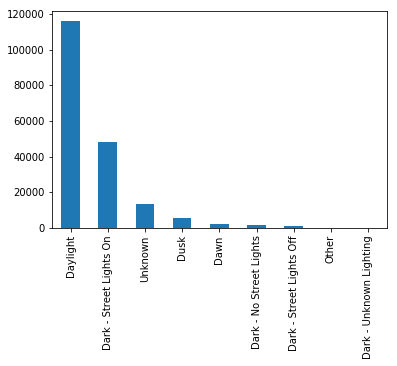

In [18]:
df['LIGHTCOND'].value_counts().plot(kind = 'bar')

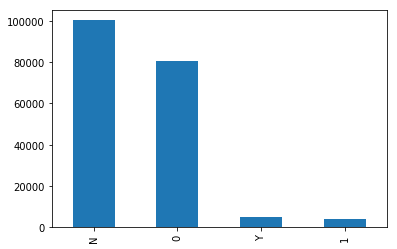

In [19]:
df['UNDERINFL'].value_counts().plot(kind = 'bar')

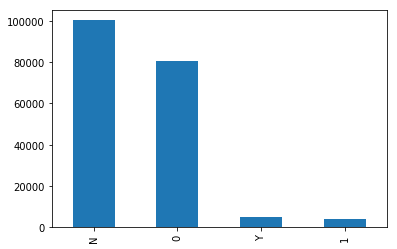

In [20]:
df['UNDERINFL'].value_counts().plot(kind = 'bar')

In [21]:
dft = df[['SEVERITYCODE','INATTENTIONIND','UNDERINFL','SPEEDING','WEATHER','ROADCOND','LIGHTCOND']]
dft

,SEVERITYCODE,INATTENTIONIND,UNDERINFL,SPEEDING,WEATHER,ROADCOND,LIGHTCOND
0,2,NaN,N,NaN,Overcast,Wet,Daylight
1,1,NaN,0,NaN,Raining,Wet,Dark - Street Lights On
2,1,NaN,0,NaN,Overcast,Dry,Daylight
3,1,NaN,N,NaN,Clear,Dry,Daylight
4,2,NaN,0,NaN,Raining,Wet,Daylight
5,1,NaN,N,NaN,Clear,Dry,Daylight
6,1,NaN,0,NaN,Raining,Wet,Daylight
7,2,NaN,N,NaN,Clear,Dry,Daylight
8,1,NaN,0,NaN,Clear,Dry,Daylight
9,2,NaN,0,NaN,Clear,Dry,Daylight


In [22]:
indexNames = dft[ dft['UNDERINFL'] == 'Y' ].index

In [23]:
dft.drop(indexNames , inplace=True)
dft

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,SEVERITYCODE,INATTENTIONIND,UNDERINFL,SPEEDING,WEATHER,ROADCOND,LIGHTCOND
0,2,NaN,N,NaN,Overcast,Wet,Daylight
1,1,NaN,0,NaN,Raining,Wet,Dark - Street Lights On
2,1,NaN,0,NaN,Overcast,Dry,Daylight
3,1,NaN,N,NaN,Clear,Dry,Daylight
4,2,NaN,0,NaN,Raining,Wet,Daylight
5,1,NaN,N,NaN,Clear,Dry,Daylight
6,1,NaN,0,NaN,Raining,Wet,Daylight
7,2,NaN,N,NaN,Clear,Dry,Daylight
8,1,NaN,0,NaN,Clear,Dry,Daylight
9,2,NaN,0,NaN,Clear,Dry,Daylight


In [24]:
indexNames = dft[ dft['UNDERINFL'] == 1 ].index
dft.drop(indexNames , inplace=True)
dft

,SEVERITYCODE,INATTENTIONIND,UNDERINFL,SPEEDING,WEATHER,ROADCOND,LIGHTCOND
0,2,NaN,N,NaN,Overcast,Wet,Daylight
1,1,NaN,0,NaN,Raining,Wet,Dark - Street Lights On
2,1,NaN,0,NaN,Overcast,Dry,Daylight
3,1,NaN,N,NaN,Clear,Dry,Daylight
4,2,NaN,0,NaN,Raining,Wet,Daylight
5,1,NaN,N,NaN,Clear,Dry,Daylight
6,1,NaN,0,NaN,Raining,Wet,Daylight
7,2,NaN,N,NaN,Clear,Dry,Daylight
8,1,NaN,0,NaN,Clear,Dry,Daylight
9,2,NaN,0,NaN,Clear,Dry,Daylight


In [25]:
indexNames = dft[ dft['INATTENTIONIND'] == 'Y' ].index
dft.drop(indexNames , inplace=True)
dft

,SEVERITYCODE,INATTENTIONIND,UNDERINFL,SPEEDING,WEATHER,ROADCOND,LIGHTCOND
0,2,NaN,N,NaN,Overcast,Wet,Daylight
1,1,NaN,0,NaN,Raining,Wet,Dark - Street Lights On
2,1,NaN,0,NaN,Overcast,Dry,Daylight
3,1,NaN,N,NaN,Clear,Dry,Daylight
4,2,NaN,0,NaN,Raining,Wet,Daylight
5,1,NaN,N,NaN,Clear,Dry,Daylight
6,1,NaN,0,NaN,Raining,Wet,Daylight
7,2,NaN,N,NaN,Clear,Dry,Daylight
8,1,NaN,0,NaN,Clear,Dry,Daylight
9,2,NaN,0,NaN,Clear,Dry,Daylight


In [26]:
indexNames = dft[ dft['SPEEDING'] == 'Y' ].index
dft.drop(indexNames , inplace=True)
dft

,SEVERITYCODE,INATTENTIONIND,UNDERINFL,SPEEDING,WEATHER,ROADCOND,LIGHTCOND
0,2,NaN,N,NaN,Overcast,Wet,Daylight
1,1,NaN,0,NaN,Raining,Wet,Dark - Street Lights On
2,1,NaN,0,NaN,Overcast,Dry,Daylight
3,1,NaN,N,NaN,Clear,Dry,Daylight
4,2,NaN,0,NaN,Raining,Wet,Daylight
5,1,NaN,N,NaN,Clear,Dry,Daylight
6,1,NaN,0,NaN,Raining,Wet,Daylight
7,2,NaN,N,NaN,Clear,Dry,Daylight
8,1,NaN,0,NaN,Clear,Dry,Daylight
9,2,NaN,0,NaN,Clear,Dry,Daylight


In [27]:
dft['SEVERITYCODE'].value_counts()

1    109185
2     43108
Name: SEVERITYCODE, dtype: int64

In [28]:
dft.drop(['INATTENTIONIND', 'UNDERINFL', 'SPEEDING' ], axis=1, inplace=True)

In [29]:
dft

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
5,1,Clear,Dry,Daylight
6,1,Raining,Wet,Daylight
7,2,Clear,Dry,Daylight
8,1,Clear,Dry,Daylight
9,2,Clear,Dry,Daylight


In [30]:
dft.dropna(axis=0, inplace=True)
dft

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
5,1,Clear,Dry,Daylight
6,1,Raining,Wet,Daylight
7,2,Clear,Dry,Daylight
8,1,Clear,Dry,Daylight
9,2,Clear,Dry,Daylight


In [31]:
dft['SEVERITYCODE'].value_counts()

1    105064
2     42003
Name: SEVERITYCODE, dtype: int64

In [32]:
dft['WEATHER'].value_counts()

Clear                       85524
Raining                     24416
Overcast                    21020
Unknown                     14162
Other                         736
Snowing                       656
Fog/Smog/Smoke                400
Sleet/Hail/Freezing Rain       82
Blowing Sand/Dirt              46
Severe Crosswind               20
Partly Cloudy                   5
Name: WEATHER, dtype: int64

In [33]:
indexNames = dft[ dft['WEATHER'] == 'Unknown' ].index
dft.drop(indexNames , inplace=True)
indexNames = dft[ dft['ROADCOND'] == 'Unknown' ].index
dft.drop(indexNames , inplace=True)
indexNames = dft[ dft['LIGHTCOND'] == 'Unknown' ].index
dft.drop(indexNames , inplace=True)
dft

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
5,1,Clear,Dry,Daylight
6,1,Raining,Wet,Daylight
7,2,Clear,Dry,Daylight
8,1,Clear,Dry,Daylight
9,2,Clear,Dry,Daylight


In [34]:
indexNames = dft[ dft['WEATHER'] == 'Other' ].index
dft.drop(indexNames , inplace=True)
indexNames = dft[ dft['ROADCOND'] == 'Other' ].index
dft.drop(indexNames , inplace=True)
indexNames = dft[ dft['LIGHTCOND'] == 'Other' ].index
dft.drop(indexNames , inplace=True)
dft

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
5,1,Clear,Dry,Daylight
6,1,Raining,Wet,Daylight
7,2,Clear,Dry,Daylight
8,1,Clear,Dry,Daylight
9,2,Clear,Dry,Daylight


In [35]:
dft['SEVERITYCODE'].value_counts()

1    88259
2    40857
Name: SEVERITYCODE, dtype: int64

In [36]:
from sklearn.utils import resample

In [37]:
# Separate majority and minority classes
df_majority = dft[dft.SEVERITYCODE==1]
df_minority = dft[dft.SEVERITYCODE==2]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=40857,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
dftd = pd.concat([df_majority_downsampled, df_minority])
dftd

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
193258,1,Raining,Wet,Daylight
53471,1,Raining,Wet,Daylight
115753,1,Raining,Dry,Daylight
170248,1,Clear,Wet,Daylight
29902,1,Clear,Dry,Dark - Street Lights On
47526,1,Raining,Wet,Daylight
168737,1,Clear,Dry,Daylight
18142,1,Raining,Wet,Dark - Street Lights On
33502,1,Clear,Dry,Daylight
33621,1,Overcast,Wet,Dark - Street Lights On


In [38]:
dftd['SEVERITYCODE'].value_counts()

2    40857
1    40857
Name: SEVERITYCODE, dtype: int64

In [39]:
dftd['WEATHER'].value_counts()

Clear                       52719
Raining                     15471
Overcast                    12857
Snowing                       333
Fog/Smog/Smoke                248
Sleet/Hail/Freezing Rain       48
Blowing Sand/Dirt              25
Severe Crosswind                9
Partly Cloudy                   4
Name: WEATHER, dtype: int64

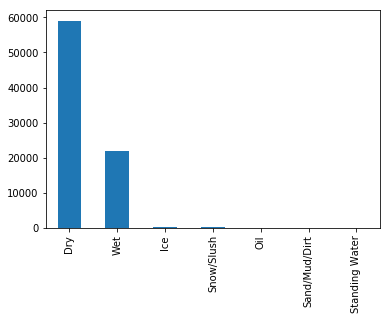

In [40]:
dftd['ROADCOND'].value_counts().plot(kind = 'bar')

In [41]:
dftd

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
193258,1,Raining,Wet,Daylight
53471,1,Raining,Wet,Daylight
115753,1,Raining,Dry,Daylight
170248,1,Clear,Wet,Daylight
29902,1,Clear,Dry,Dark - Street Lights On
47526,1,Raining,Wet,Daylight
168737,1,Clear,Dry,Daylight
18142,1,Raining,Wet,Dark - Street Lights On
33502,1,Clear,Dry,Daylight
33621,1,Overcast,Wet,Dark - Street Lights On


In [42]:
dftd['ROADCOND'].value_counts()

Dry               58994
Wet               21894
Ice                 398
Snow/Slush          316
Oil                  41
Sand/Mud/Dirt        36
Standing Water       35
Name: ROADCOND, dtype: int64

In [43]:
dftd['ROADCOND'].replace(to_replace=['Dry','Wet','Ice','Snow/Slush','Oil','Sand/Mud/Dirt','Standing Water'], value=[0,1,2,3,4,5,6],inplace=True)
dftd.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
193258,1,Raining,1,Daylight
53471,1,Raining,1,Daylight
115753,1,Raining,0,Daylight
170248,1,Clear,1,Daylight
29902,1,Clear,0,Dark - Street Lights On


In [44]:
dftd['LIGHTCOND'].value_counts()

Daylight                    55646
Dark - Street Lights On     21051
Dusk                         2786
Dawn                         1152
Dark - No Street Lights       597
Dark - Street Lights Off      477
Dark - Unknown Lighting         5
Name: LIGHTCOND, dtype: int64

In [45]:
dftd['LIGHTCOND'].replace(to_replace=['Daylight','Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'], value=[0,1,2,3,4,5,6],inplace=True)
dftd.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
193258,1,Raining,1,0
53471,1,Raining,1,0
115753,1,Raining,0,0
170248,1,Clear,1,0
29902,1,Clear,0,1


In [46]:
dftd['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
dftd.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
193258,1,1,1,0
53471,1,1,1,0
115753,1,1,0,0
170248,1,0,1,0
29902,1,0,0,1


In [47]:
dftd['LIGHTCOND'].value_counts()

0    55646
1    21051
2     2786
3     1152
4      597
5      477
6        5
Name: LIGHTCOND, dtype: int64

In [48]:
from sklearn.utils import shuffle
dftd = shuffle(dftd)
dftd

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
18272,2,2,0,0
188842,2,1,1,0
77027,1,0,0,0
191140,1,0,0,0
146670,2,1,1,0
118934,2,1,1,0
11419,1,1,1,2
21864,1,0,0,0
163753,1,1,1,0
163782,2,2,1,0


In [49]:
Feature = dftd[['WEATHER','ROADCOND','LIGHTCOND']]
X = Feature
X[0:5]

,WEATHER,ROADCOND,LIGHTCOND
18272,2,0,0
188842,1,1,0
77027,0,0,0
191140,0,0,0
146670,1,1,0


In [50]:
y = dftd['SEVERITYCODE'].values
y[0:5]

array([2, 2, 1, 1, 2])

In [51]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 1.81423631, -0.57078462, -0.54941351],
       [ 0.57642869,  1.35717066, -0.54941351],
       [-0.66137894, -0.57078462, -0.54941351],
       [-0.66137894, -0.57078462, -0.54941351],
       [ 0.57642869,  1.35717066, -0.54941351]])

# Classification

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (57199, 3) (57199,)
Test set: (24515, 3) (24515,)


# K Nearest Neighbor(KNN)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [54]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.50389557, 0.50511931, 0.49043443, 0.49365694, 0.49320824,
       0.4943504 , 0.49496227, 0.50907608, 0.50715888, 0.50817867,
       0.50671018, 0.50817867, 0.50617989, 0.50772996, 0.50703651,
       0.5094432 , 0.50719967, 0.50805629, 0.50736284, 0.50899449,
       0.507526  , 0.50928003, 0.50870895, 0.50936162, 0.50809708,
       0.50826025, 0.50777075, 0.50854579, 0.50887212, 0.50907608,
       0.50915766, 0.50915766, 0.5094432 , 0.50919845, 0.5089537 ,
       0.50932082, 0.50899449, 0.50936162, 0.50858658, 0.50874975,
       0.50866816, 0.50879054, 0.50874975, 0.50936162, 0.5216806 ,
       0.52221089, 0.52212931, 0.52229247, 0.52049765])

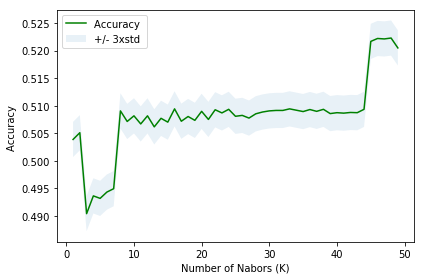

In [55]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [56]:
k = 39
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhatKN = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatKN))
neigh

Train set Accuracy:  0.5104110211716988
Test set Accuracy:  0.5085865796451152


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=39, p=2,
           weights='uniform')

# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
acidTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
acidTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
acidTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
predTree = acidTree.predict(X_test)

In [61]:
print (predTree [0:5])
print (y_test [0:5])

[2 2 1 2 1]
[1 1 2 2 1]


# Logistic Regression

In [62]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.5204160717927799


In [63]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
yhatLR = LR.predict(X_test)
yhatLR

array([2, 2, 1, ..., 2, 2, 1])

In [66]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.49448558, 0.50551442],
       [0.48793171, 0.51206829],
       [0.51023623, 0.48976377],
       ...,
       [0.49187406, 0.50812594],
       [0.49187406, 0.50812594],
       [0.5089307 , 0.4910693 ]])

# Support Vector Machine

In [67]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
yhatSVM = clf.predict(X_test)
yhatSVM [0:5]

array([2, 2, 1, 2, 1])

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.54      0.30      0.39     12259
           2       0.51      0.74      0.61     12256

   micro avg       0.52      0.52      0.52     24515
   macro avg       0.53      0.52      0.50     24515
weighted avg       0.53      0.52      0.50     24515

Confusion matrix, without normalization
[[3710 8549]
 [3193 9063]]


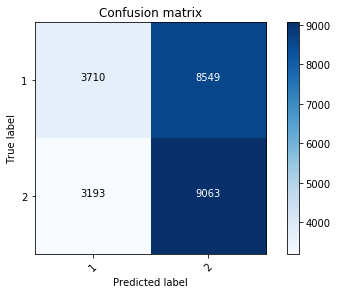

In [71]:
cnf_matrix = confusion_matrix(y_test, yhatSVM, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhatSVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix')

In [482]:
from sklearn.metrics import f1_score
KNN_f1 = f1_score(y_test, yhatKN, average='weighted')
KNN_f1

0.47948468209658823

In [483]:
from sklearn.metrics import jaccard_similarity_score
KNN_J = jaccard_similarity_score(y_test, yhatKN)
KNN_J

0.5212318988374465

In [484]:
DT_f1 = f1_score(y_test, predTree, average='weighted') 
DT_f1

0.49854024839267036

In [485]:
DT_J = jaccard_similarity_score(y_test, predTree)
DT_J

0.5183357128288802

In [486]:
LR_f1 = f1_score(y_test, yhatLR, average='weighted') 
LR_f1

0.5026081254997574

In [487]:
LR_J = jaccard_similarity_score(y_test, yhatLR)
LR_J

0.5189475831123802

In [488]:
SVM_f1 = f1_score(y_test, yhatSVM, average='weighted') 
SVM_f1

0.49324526652596556

In [489]:
SVM_J = jaccard_similarity_score(y_test, yhatSVM)
SVM_J

0.5178462166020804

In [490]:
from sklearn.metrics import log_loss
log_loss_testyhatLR = LR.predict_proba(X_test)
log_loss(y_test, log_loss_testyhatLR)

0.692365175237872

# Results

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.52    | 0.48     | NA      |
| Decision Tree      | 0.52    | 0.50     | NA      |
| SVM                | 0.52    | 0.49     | NA      |
| LogisticRegression | 0.52    | 0.50     | 0.69    |